<center>
A crash course in
<br><br>
<b><font size=44px>Surviving Titanic</font></b>
<br><br>
(with numpy and matplotlib)
</center>

---

This notebook is going to teach you to use the basic data science stack for Python: Jupyter, Numpy, matplotlib, and sklearn.

### Part I: Jupyter notebooks in a nutshell
* You are reading this line in a jupyter notebook.
* A notebook consists of cells. A cell can contain either code or hypertext. 
    * This cell contains hypertext. The next cell contains code.
* You can __run a cell__ with code by selecting it (click) and pressing `Ctrl + Enter` to execute the code and display output(if any).
* If you're running this on a device with no keyboard, ~~you are doing it wrong~~ use the top bar (esp. play/stop/restart buttons) to run code.
* Behind the curtains, there's a Python interpreter that runs that code and remembers anything you defined.

Run these cells to get started

In [1]:
a = 5

In [2]:
print(a * 2)

10


* `Ctrl + S` to save changes (or use the button that looks like a floppy disk)
* Top menu → Kernel → Interrupt (or Stop button) if you want it to stop running cell midway.
* Top menu → Kernel → Restart (or cyclic arrow button) if interrupt doesn't fix the problem (you will lose all variables).
* For shortcut junkies like us: Top menu → Help → Keyboard Shortcuts


* More: [Hacker's guide](http://arogozhnikov.github.io/2016/09/10/jupyter-features.html), [Beginner's guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/), [Datacamp tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)

Now __the most important feature__ of jupyter notebooks for this course: 
* if you're typing something, press `Tab` to see automatic suggestions, use arrow keys + enter to pick one.
* if you move your cursor inside some function and press `Shift + Tab`, you'll get a help window. `Shift + (Tab , Tab)` (press `Tab` twice) will expand it.

In [3]:
# run this first
import math

In [4]:
#place your cursor at the end of the unfinished line below to find a function
#that computes arctangent from two parameters (should have 2 in it's name)
#once you chose it, press shift + tab + tab(again) to see the docs

math.atan2(1,1/2) # <---

1.1071487177940904

### Part II: Loading data with Pandas
Pandas is a library that helps you load the data, prepare it and perform some lightweight analysis. The god object here is the `pandas.DataFrame` - a 2D table with batteries included. 

In the cells below we use it to read the data on the infamous titanic shipwreck.

__please keep running all the code cells as you read__

In [5]:
# If you are running in Google Colab, this cell will download the dataset from our repository.
# Otherwise, this cell will do nothing.

import sys
if 'google.colab' in sys.modules:
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/spring20/week01_intro/primer_python_for_ml/train.csv

In [6]:
import pandas as pd
# this yields a pandas.DataFrame
data = pd.read_csv("train.csv", index_col='PassengerId')

In [7]:
# Selecting rows
head = data[:10]

head  # if you leave an expression at the end of a cell, jupyter will "display" it automatically

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender (in those good ol' times when there were just 2 of them)
* Age - age in years, if available
* Sibsp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [8]:
# table dimensions
print("len(data) =", len(data))
print("data.shape =", data.shape)

len(data) = 891
data.shape = (891, 11)


In [9]:
# select a single row by PassengerId (using .loc)
print(data.loc[4])

Survived                                               1
Pclass                                                 1
Name        Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                               female
Age                                                   35
SibSp                                                  1
Parch                                                  0
Ticket                                            113803
Fare                                                53.1
Cabin                                               C123
Embarked                                               S
Name: 4, dtype: object


In [10]:
# select a single row by index (using .iloc)
print(data.iloc[3])

Survived                                               1
Pclass                                                 1
Name        Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                               female
Age                                                   35
SibSp                                                  1
Parch                                                  0
Ticket                                            113803
Fare                                                53.1
Cabin                                               C123
Embarked                                               S
Name: 4, dtype: object


In [11]:
# select a single column.
ages = data["Age"]
print(ages[:10])  # alternatively: data.Age

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64


In [13]:
# select several columns and rows at once
# alternatively: data[["Fare","Pclass"]].loc[5:10]
data.loc[5:10, ("Fare", "Pclass")]

,Fare,Pclass
PassengerId,,
5,8.0500,3
6,8.4583,3
7,51.8625,1
8,21.0750,3
9,11.1333,3
10,30.0708,2


## Your turn:


In [15]:
# Select passengers number 13 and 666 (with these PassengerId values). Did they survive?

data.loc[[13,16]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.05,NaN,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.00,NaN,S


In [43]:
# Compute the overall survival rate: what fraction of passengers survived the shipwreck?

#sum(data.loc[:,"Survived"])/len(data)
sum(data["Survived"])/len(data)

0.3838383838383838

---

Pandas also has some basic data analysis tools. For one, you can quickly display statistical aggregates for each column using `.describe()`

In [18]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Some columns contain __NaN__ values - this means that there is no data there. For example, passenger `#6` has unknown age. To simplify the future data analysis, we'll replace NaN values by using pandas `fillna` function.

_Note: we do this so easily because it's a tutorial. In general, you think twice before you modify data like this._

In [19]:
data.loc[6]

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                      NaN
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 6, dtype: object

In [20]:
data['Age'] = data['Age'].fillna(value=data['Age'].mean())
data['Fare'] = data['Fare'].fillna(value=data['Fare'].mean())

In [21]:
data.loc[6]

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                  29.6991
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 6, dtype: object

More pandas: 
* A neat [tutorial](http://pandas.pydata.org/) from pydata
* Official [tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html), including this [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html#min)
* Bunch of cheat sheets awaits just one google query away from you (e.g. [basics](http://blog.yhat.com/static/img/datacamp-cheat.png), [combining datasets](https://pbs.twimg.com/media/C65MaMpVwAA3v0A.jpg) and so on). 

### Part III: Numpy and vectorized computing

Almost any machine learning model requires some computational heavy lifting usually involving linear algebra problems. Unfortunately, raw Python is terrible at this because each operation is interpreted at runtime. 

So instead, we'll use `numpy` - a library that lets you run blazing fast computation with vectors, matrices and other tensors. Again, the god object here is `numpy.ndarray`:

In [22]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])

print("a =", a)
print("b =", b)

# math and boolean operations can applied to each element of an array
print("a + 1 =", a + 1)
print("a * 2 =", a * 2)
print("a == 2", a == 2)
# ... or corresponding elements of two (or more) arrays
print("a + b =", a + b)
print("a * b =", a * b)

a = [1 2 3 4 5]
b = [5 4 3 2 1]
a + 1 = [2 3 4 5 6]
a * 2 = [ 2  4  6  8 10]
a == 2 [False  True False False False]
a + b = [6 6 6 6 6]
a * b = [5 8 9 8 5]


In [23]:
# Your turn: compute half-products of a and b elements (i.e. ½ of the products of corresponding elements)
print("a * b / 2 =", a * b / 2)

a * b / 2 = [2.5 4.  4.5 4.  2.5]


In [24]:
# compute elementwise quotient between squared a and (b plus 1)
print("(a**2) / ( b + 1 ) =", (a**2) / ( b + 1 ))

(a**2) / ( b + 1 ) = [ 0.16666667  0.8         2.25        5.33333333 12.5       ]


---


### How fast is it, Harry?
![img](https://img.buzzfeed.com/buzzfeed-static/static/2015-11/6/7/enhanced/webdr10/enhanced-buzz-22847-1446811476-0.jpg)

Let's compare computation time for Python and Numpy
* Two arrays of $10^6$ elements
 * first one: from 0 to 1 000 000
 * second one: from 99 to 1 000 099
 
* Computing:
 * elementwise sum
 * elementwise product
 * square root of first array
 * sum of all elements in the first array
 

In [25]:
%%time
# ^-- this "magic" measures and prints cell computation time

# Option I: pure Python
arr_1 = range(1000000)
arr_2 = range(99, 1000099)


a_sum = []
a_prod = []
sqrt_a1 = []
for i in range(len(arr_1)):
    a_sum.append(arr_1[i]+arr_2[i])
    a_prod.append(arr_1[i]*arr_2[i])
    a_sum.append(arr_1[i]**0.5)

arr_1_sum = sum(arr_1)

CPU times: user 1.08 s, sys: 130 ms, total: 1.21 s
Wall time: 1.21 s


In [26]:
%%time

# Option II: start from Python, convert to numpy
arr_1 = range(1000000)
arr_2 = range(99, 1000099)

arr_1, arr_2 = np.array(arr_1), np.array(arr_2)


a_sum = arr_1 + arr_2
a_prod = arr_1 * arr_2
sqrt_a1 = arr_1 ** .5
arr_1_sum = arr_1.sum()

CPU times: user 425 ms, sys: 92.6 ms, total: 517 ms
Wall time: 518 ms


In [27]:
%%time

# Option III: pure numpy
arr_1 = np.arange(1000000)
arr_2 = np.arange(99, 1000099)

a_sum = arr_1 + arr_2
a_prod = arr_1 * arr_2
sqrt_a1 = arr_1 ** .5
arr_1_sum = arr_1.sum()

CPU times: user 81.1 ms, sys: 0 ns, total: 81.1 ms
Wall time: 82.7 ms


If you want more serious benchmarks, take a look at [this](http://brilliantlywrong.blogspot.ru/2015/01/benchmarks-of-speed-numpy-vs-all.html).

---


There's also a bunch of pre-implemented operations including logarithms, trigonometry, vector/matrix products and aggregations.

In [28]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])

print("numpy.sum(a) =", np.sum(a))
print("numpy.mean(a) =", np.mean(a))
print("numpy.min(a) =",  np.min(a))
print("numpy.argmin(b) =", np.argmin(b))  # index of minimal element

# dot product. Also used for matrix/tensor multiplication
print("numpy.dot(a,b) =", np.dot(a, b))
np.dot()

print("numpy.unique(['male','male','female','female','male']) =",
    np.unique(['male', 'male', 'female', 'female', 'male']))

numpy.sum(a) = 15
numpy.mean(a) = 3.0
numpy.min(a) = 1
numpy.argmin(b) = 4
numpy.dot(a,b) = 35
numpy.unique(['male','male','female','female','male']) = ['female' 'male']


There is a lot more stuff. Check out a Numpy cheat sheet [here](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf).

The important part: all this functionality works with dataframes:

In [29]:
print("Max ticket price: ", np.max(data["Fare"]))
print("\nThe guy who paid the most:\n", data.iloc[np.argmax(data["Fare"])])

Max ticket price:  512.3292

The guy who paid the most:
 Survived                   1
Pclass                     1
Name        Ward, Miss. Anna
Sex                   female
Age                       35
SibSp                      0
Parch                      0
Ticket              PC 17755
Fare                 512.329
Cabin                    NaN
Embarked                   C
Name: 259, dtype: object


In [35]:
# your code: compute mean passenger age and the oldest guy on the ship
print("mean age: ", np.mean(data["Age"]))
print()
print("olderst person: ", data.iloc[np.argmax(data["Age"])])

mean age:  29.699117647058763

olderst person:  Survived                                       1
Pclass                                         1
Name        Barkworth, Mr. Algernon Henry Wilson
Sex                                         male
Age                                           80
SibSp                                          0
Parch                                          0
Ticket                                     27042
Fare                                          30
Cabin                                        A23
Embarked                                       S
Name: 631, dtype: object


In [36]:
print("Boolean operations")

print('a =', a)
print('b =', b)
print("a > 2", a > 2)
print("numpy.logical_not(a>2) =", np.logical_not(a > 2))
print("numpy.logical_and(a>2,b>2) =", np.logical_and(a > 2, b > 2))
print("numpy.logical_or(a>4,b<3) =", np.logical_or(a > 2, b < 3))

print()

print("shortcuts")
print("~(a > 2) =", ~(a > 2))  # logical_not(a > 2)
print("(a > 2) & (b > 2) =", (a > 2) & (b > 2))  # logical_and
print("(a > 2) | (b < 3) =", (a > 2) | (b < 3))  # logical_or

Boolean operations
a = [1 2 3 4 5]
b = [5 4 3 2 1]
a > 2 [False False  True  True  True]
numpy.logical_not(a>2) = [ True  True False False False]
numpy.logical_and(a>2,b>2) = [False False  True False False]
numpy.logical_or(a>4,b<3) = [False False  True  True  True]

shortcuts
~(a > 2) = [ True  True False False False]
(a > 2) & (b > 2) = [False False  True False False]
(a > 2) | (b < 3) = [False False  True  True  True]


The final Numpy feature we'll need is indexing: selecting elements from an array. 
Aside from Python indexes and slices (e.g. `a[1:4]`), Numpy also allows you to select several elements at once.

In [37]:
a = np.array([0, 1, 4, 9, 16, 25])
ix = np.array([1, 2, 5])

print("a =", a)
print("Select by element index")
print("a[[1,2,5]] =", a[ix])

print("\nSelect by boolean mask")
# select all elementts in a that are greater than 5
print("a[a > 5] =", a[a > 5])
print("(a % 2 == 0) =", a % 2 == 0)  # True for even, False for odd
print("a[a % 2 == 0] =", a[a % 2 == 0])  # select all elements in a that are even

a = [ 0  1  4  9 16 25]
Select by element index
a[[1,2,5]] = [ 1  4 25]

Select by boolean mask
a[a > 5] = [ 9 16 25]
(a % 2 == 0) = [ True False  True False  True False]
a[a % 2 == 0] = [ 0  4 16]


In [38]:
# select male children
print("data[(data['Age'] < 18) & (data['Sex'] == 'male')] = (below)")
data[(data['Age'] < 18) & (data['Sex'] == 'male')]

data[(data['Age'] < 18) & (data['Sex'] == 'male')] = (below)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
87,0,3,"Ford, Mr. William Neal",male,16.00,1,3,W./C. 6608,34.3750,NaN,S
126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
139,0,3,"Osen, Mr. Olaf Elon",male,16.00,0,0,7534,9.2167,NaN,S


### Your turn

Use numpy and pandas to answer a few questions about data

In [41]:
# who on average paid more for their ticket, men or women?

mean_fare_men = np.mean(data[data['Sex'] == 'male']["Fare"])
mean_fare_women = np.mean(data[data['Sex'] == 'female']["Fare"])

print(mean_fare_men, mean_fare_women)

25.523893414211418 44.47981783439487


In [44]:
# who is more likely to survive: a child (<18 yo) or an adult?

child_survival_rate = np.sum(data[data["Age"]<18]["Survived"])/np.size(data[data["Age"]<18]["Survived"])
adult_survival_rate = np.sum(data[data["Age"]>=18]["Survived"])/np.size(data[data["Age"]>=18]["Survived"])

print(child_survival_rate, adult_survival_rate)

0.5398230088495575 0.36118251928020567


# Part IV: plots and matplotlib

Using Python to visualize the data is covered by yet another library: matplotlib.

Just like Python itself, matplotlib has an awesome tendency of keeping simple things simple while still allowing you to write complicated stuff with convenience (e.g. super-detailed plots or custom animations).

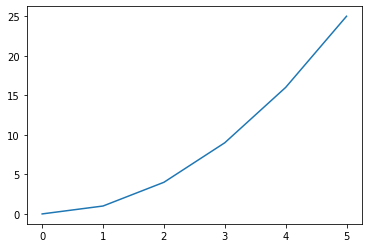

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
# ^-- this "magic" tells all future matplotlib plots to be drawn inside notebook and not in a separate window.

# line plot
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25])

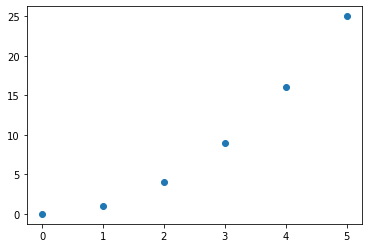

In [46]:
# scatter-plot
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25])

plt.show()  # show the first plot and begin drawing next one

Text(0, 0.5, '# Layers in state of the art image classifier')

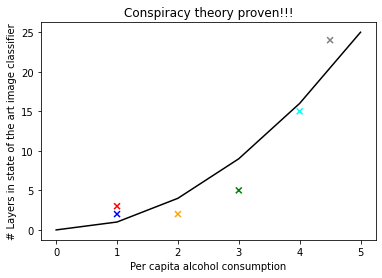

In [47]:
# draw a scatter plot with custom markers and colors
plt.scatter([1, 1, 2, 3, 4, 4.5], [3, 2, 2, 5, 15, 24],
            c=["red", "blue", "orange", "green", "cyan", "gray"], marker="x")

# without .show(), several plots will be drawn on top of one another
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25], c="black")

# adding more sugar
plt.title("Conspiracy theory proven!!!")
plt.xlabel("Per capita alcohol consumption")
plt.ylabel("# Layers in state of the art image classifier")

# fun with correlations: http://bit.ly/1FcNnWF

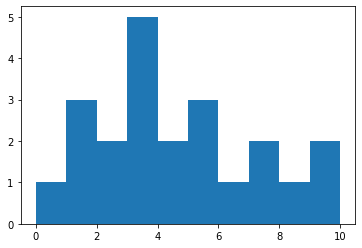

(array([4., 7., 5., 3., 3.]),
 array([ 0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 5 Patch objects>)

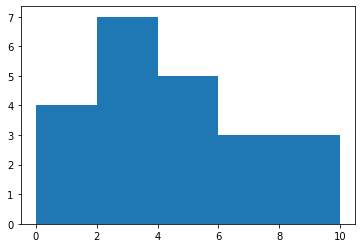

In [48]:
# histogram - showing data density
plt.hist([0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4, 
          4, 5, 5, 5, 6, 7, 7, 8, 9, 10])
plt.show()

plt.hist([0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4,
          4, 5, 5, 5, 6, 7, 7, 8, 9, 10], bins=5)

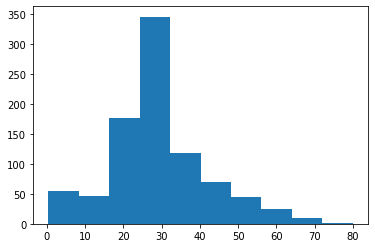

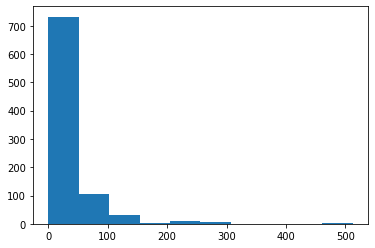

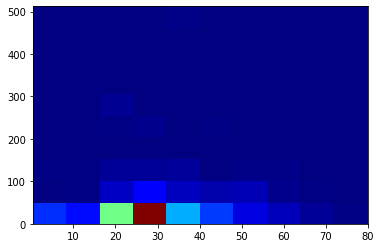

In [57]:
# plot a histogram of age and a histogram of ticket fares on separate plots

plt.hist(data["Age"])
plt.show()

plt.hist(data["Fare"])
plt.show()

plt.hist2d(data["Age"], data["Fare"], cmap=plt.cm.jet)
plt.show()


# bonus: use tab shift-tab to see if there is a way to draw a 2D histogram of age vs fare.

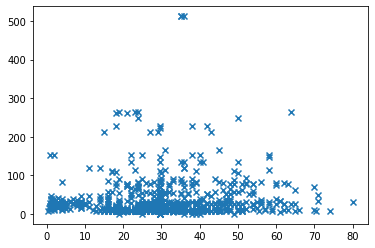

In [58]:
# make a scatter plot of passenger age vs ticket fare

plt.scatter(data["Age"], data["Fare"], marker="x")

# kudos if you add separate colors for men and women

* Extended [tutorial](https://matplotlib.org/2.0.2/users/pyplot_tutorial.html)
* A [cheat sheet](http://bit.ly/2koHxNF)
* Other libraries for more sophisticated stuff: [Plotly](https://plot.ly/python/) and [Bokeh](https://bokeh.pydata.org/en/latest/)

### Part V (final): machine learning with scikit-learn

<img src='https://imgs.xkcd.com/comics/machine_learning.png' width=320px>

Scikit-learn is _the_ tool for simple machine learning pipelines. 

It's a single library that unites a whole bunch of models under the common interface:
* Create: `model = sklearn.whatever.ModelNameHere(parameters_if_any)`
* Train: `model.fit(X, y)`
* Predict: `model.predict(X_test)`

It also contains utilities for feature extraction, quality estimation or cross-validation.

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = data[["Parch", "Age", "Fare", "Sex", "Embarked", "SibSp"]].copy()
features["Sex"].replace({"male": 1, "female": 0}, inplace=True)
features["Embarked"].replace({"C": 0, "S": 1, "Q":2, 'NaN':3}, inplace=True)
features['Embarked'] = features['Embarked'].fillna(value=3)

answers = data["Survived"]

model = RandomForestClassifier(n_estimators=100)
model.fit(features[:-100], answers[:-100])

test_predictions = model.predict(features[-100:])
print("Test accuracy:", accuracy_score(answers[-100:], test_predictions))
print(model.feature_importances_)

Test accuracy: 0.83
[0.04403959 0.26412594 0.33187352 0.26214023 0.03701679 0.06080392]


Final quest: add more features to achieve accuracy of at least 0.80

__Hint:__ for string features like "Sex" or "Embarked" you will have to compute some kind of numeric representation.
For example, 1 if male and 0 if female or vice versa 

__Hint II:__ you can use `model.feature_importances_` to get a hint on how much did it rely each of your features.

Here are more resources for sklearn:

* [Tutorials](http://scikit-learn.org/stable/tutorial/index.html)
* [Examples](http://scikit-learn.org/stable/auto_examples/index.html)
* [Cheat sheet](http://scikit-learn.org/stable/_static/ml_map.png)

---


Okay, here's what we've learned: to survive a shipwreck you need to become an underaged girl with parents on the ship. Be sure to use this helpful advice next time you find yourself in a shipwreck.